In [14]:
from skimage.transform import ProjectiveTransform
from skimage.io import imread
from matplotlib.colors import NoNorm
import numpy as np
import matplotlib.pylab as plt
import cv2
def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

def show_double_image(image1,image2, title="Sample",figsize=(8,6)):
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=figsize)
  fig.suptitle(title)
  ax1.imshow(image1,cmap="gray", norm=NoNorm())
  ax2.imshow(image2,cmap="gray", norm=NoNorm())

In [15]:
# Points generator
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])
def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
def get_scale(x,y):
    return np.array([
        [x, 0, 0],
        [0, y, 0],
        [0, 0, 1]
    ])
def affine_transform(x,y):
    return np.array([
        [1, x, 0],
        [y, 1, 0],
        [0, 0, 1]
    ]) 



def transform(image,angle=0,scale_x=0,scale_y=0,translate_x=0,translate_y=0,shear_x=0,shear_y=0):
    height, width = image.shape[:2]
    tx, ty = np.array((width // 2, height // 2))
    R = get_rotation(angle)
    S = get_scale(scale_x,scale_y)
    T = get_translation(tx=translate_x,ty=translate_y)
    A = affine_transform(shear_x,shear_y)
    A = A@S@T@R

    height, width = image.shape[:2]
    Ainv = np.linalg.inv(A)

    # Get pixels within image
    # Grid to represent image coordinate I(x, y)
    coords = get_grid(width, height, True)
    x1, y1 = coords[0], coords[1]

    # Apply transformation and nearest neighbor interpolation
    warp_coords = np.round(A@coords).astype(np.int16)
    x2, y2 = warp_coords[0, :], warp_coords[1, :]

        # Get pixels within image
    indices = np.where((x2 >= 0) & (x2 < width) &
                           (y2 >= 0) & (y2 < height))

    xpix2, ypix2 = x2[indices], y2[indices]
    xpix1, ypix1 = x1[indices], y1[indices] 
    canvas = np.zeros_like(image)
    canvas.fill(255)
    canvas[ypix2, xpix2] = image[ypix1.astype(np.int16), xpix1.astype(np.int16)]
    return canvas




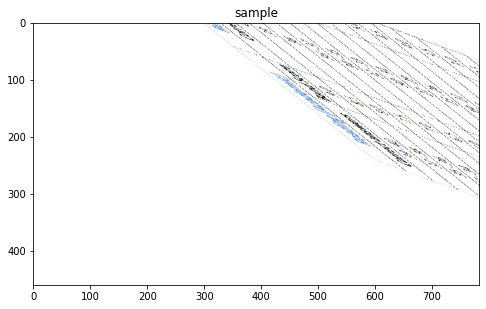

In [16]:
image = read_image('./images/bangdiem.png')
show_image(transform(image,-45,0.6,0.8,200,300))

